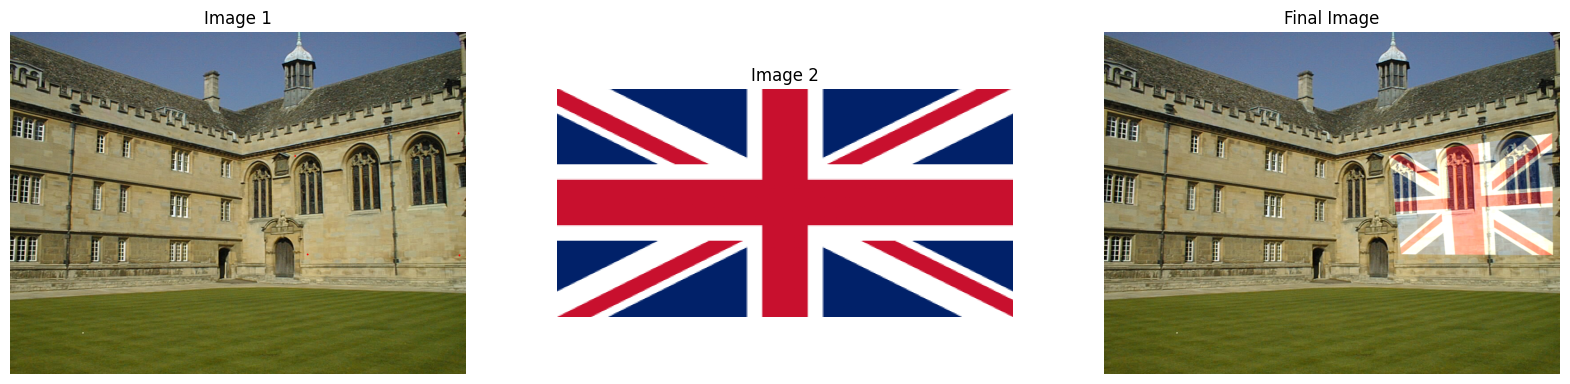

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mouse_clicks(event, x, y, flags, params):
    global coordinates
    global count
    global first_image

    if event == cv.EVENT_LBUTTONDOWN:
        coordinates.append([x, y])
        count += 1

        first_image = cv.circle(first_image, (x,y), 2, (0, 0, 1), -1)
        cv.imshow("Image", first_image)        
    
    if count == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)
image_1 = cv.imread(r"Wadham.jpg")
image_2 = cv.imread(r"Flag.png")


image_1 = image_1.astype(np.float64) / np.iinfo(image_1.dtype).max

image_2 = image_2.astype(np.float64) / np.iinfo(image_2.dtype).max

first_image = np.copy(image_1)

coordinates = []
count = 0

cv.imshow("Image", image_1)
cv.setMouseCallback("Image", mouse_clicks)
cv.waitKey(0)

cv.destroyAllWindows()

# Input parameters
X = np.array([[0, 0, 1],[image_2.shape[1], 0, 1],[image_2.shape[1], image_2.shape[0], 1],[0, image_2.shape[0], 1]]).T

Y = np.array([[coordinates[0][0], coordinates[0][1], 1],[coordinates[1][0], coordinates[1][1], 1],[coordinates[2][0], coordinates[2][1], 1],[coordinates[3][0], coordinates[3][1], 1],]).T

O = np.array([[0],[0],[0]])

A = []

for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))

A = np.array(A).squeeze().astype(np.float64)

eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

beta = 0.5
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.0)
blended_img[blended_img > 1] = 1

first_image_rgb = cv.cvtColor(first_image.astype(np.float32), cv.COLOR_BGR2RGB) 
image_2_rgb = cv.cvtColor(image_2.astype(np.float32), cv.COLOR_BGR2RGB)
blended_img_rgb = cv.cvtColor(blended_img.astype(np.float32), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(first_image_rgb)
ax[1].imshow(image_2_rgb)
ax[2].imshow(blended_img_rgb)

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

plt.show()

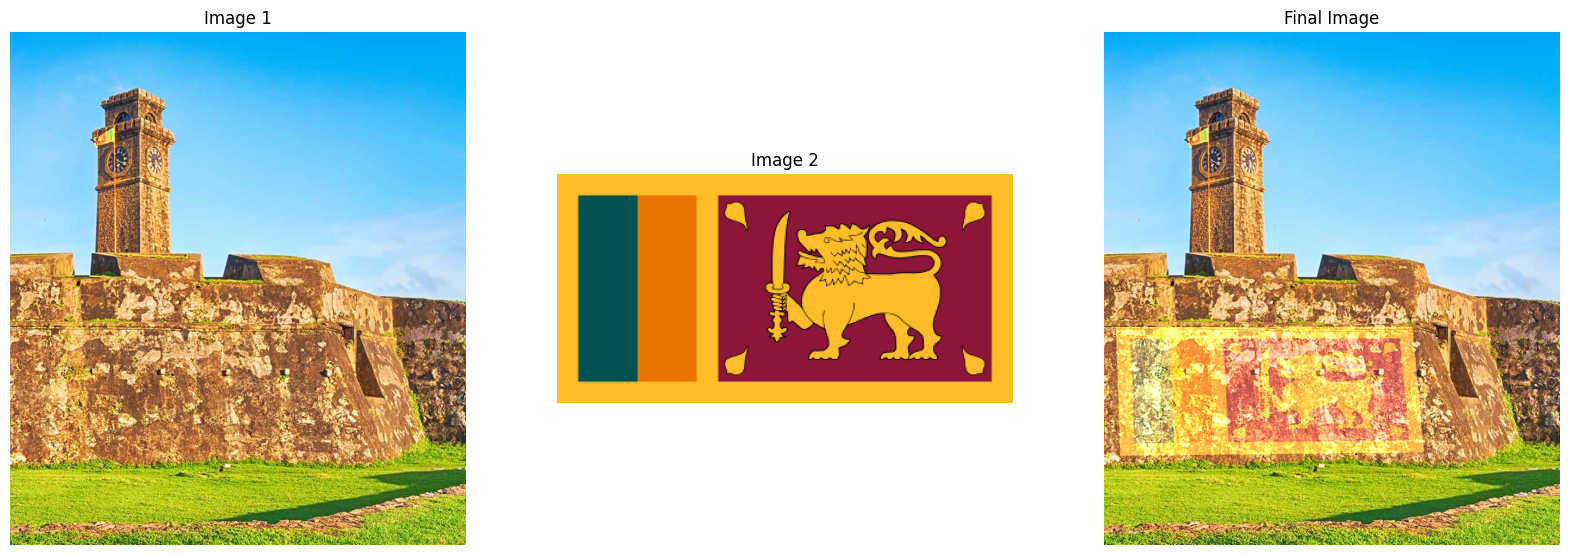

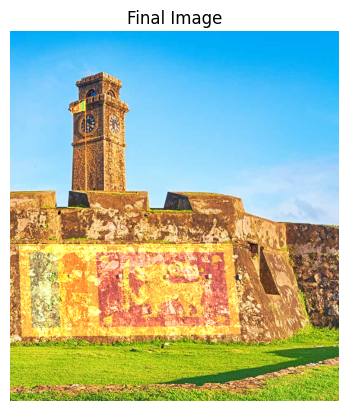

In [60]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mouse_clicks(event, x, y, flags, params):
    global coordinates
    global count
    global first_image

    if event == cv.EVENT_LBUTTONDOWN:
        coordinates.append([x, y])
        count += 1

        first_image = cv.circle(first_image, (x,y), 2, (0, 0, 1), -1)
        cv.imshow("Image", first_image)        
    
    if count == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)
image_1 = cv.imread(r"Fort.png")
image_2 = cv.imread(r"SriLanka.png")


image_1 = image_1.astype(np.float64) / np.iinfo(image_1.dtype).max

image_2 = image_2.astype(np.float64) / np.iinfo(image_2.dtype).max

first_image = np.copy(image_1)

coordinates = []
count = 0

cv.imshow("Image", image_1)
cv.setMouseCallback("Image", mouse_clicks)
cv.waitKey(0)

cv.destroyAllWindows()

# Input parameters
X = np.array([[0, 0, 1],[image_2.shape[1], 0, 1],[image_2.shape[1], image_2.shape[0], 1],[0, image_2.shape[0], 1]]).T

Y = np.array([[coordinates[0][0], coordinates[0][1], 1],[coordinates[1][0], coordinates[1][1], 1],[coordinates[2][0], coordinates[2][1], 1],[coordinates[3][0], coordinates[3][1], 1],]).T

O = np.array([[0],[0],[0]])

A = []

for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))

A = np.array(A).squeeze().astype(np.float64)

eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

beta = 0.5
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.0)
blended_img[blended_img > 1] = 1

first_image_rgb = cv.cvtColor(first_image.astype(np.float32), cv.COLOR_BGR2RGB) 
image_2_rgb = cv.cvtColor(image_2.astype(np.float32), cv.COLOR_BGR2RGB)
blended_img_rgb = cv.cvtColor(blended_img.astype(np.float32), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(first_image_rgb)
ax[1].imshow(image_2_rgb)
ax[2].imshow(blended_img_rgb)

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

plt.show()

plt.imshow(blended_img_rgb)
plt.title("Final Image")
plt.axis("off")
plt.show()

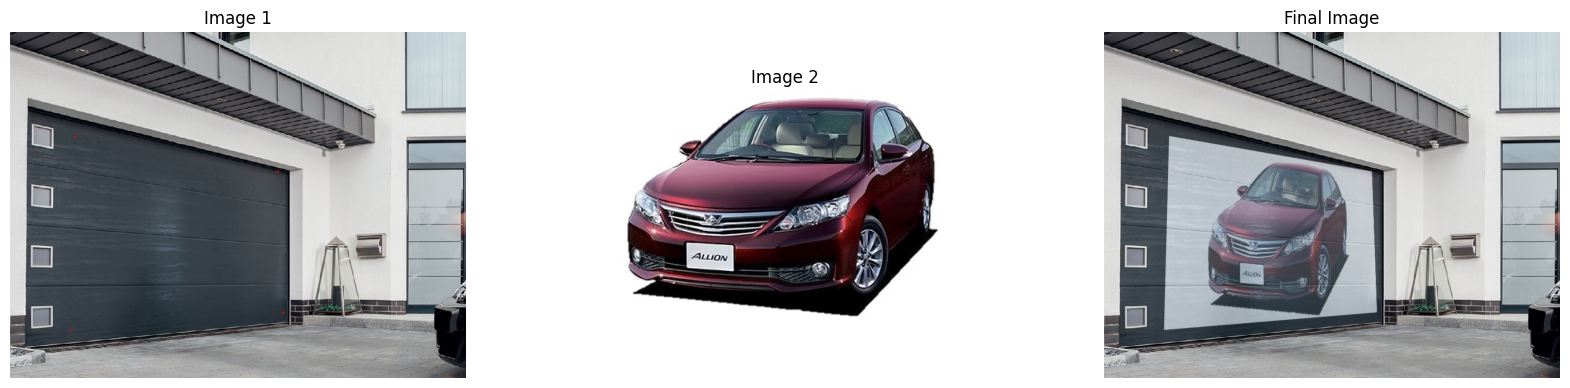

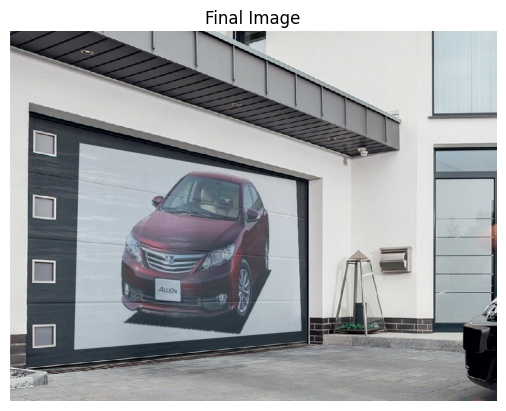

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mouse_clicks(event, x, y, flags, params):
    global coordinates, count, first_image

    if event == cv.EVENT_LBUTTONDOWN:
        coordinates.append([x, y])
        count += 1
        first_image = cv.circle(first_image, (x, y), 2, (0, 0, 1), -1)
        cv.imshow("Image", first_image)        
    
    if count == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)

# Load images
image_1 = cv.imread(r"Garage.png")
image_2 = cv.imread(r"allion.jpg")

# Normalize images
image_1 = image_1.astype(np.float64) / np.iinfo(image_1.dtype).max
image_2 = image_2.astype(np.float64) / np.iinfo(image_2.dtype).max

# Create a copy of the first image
first_image = np.copy(image_1)

coordinates = []
count = 0

cv.imshow("Image", image_1)
cv.setMouseCallback("Image", mouse_clicks)
cv.waitKey(0)
cv.destroyAllWindows()

# Input parameters
X = np.array([[0, 0, 1],
              [image_2.shape[1], 0, 1],
              [image_2.shape[1], image_2.shape[0], 1],
              [0, image_2.shape[0], 1]]).T

Y = np.array([[coordinates[0][0], coordinates[0][1], 1],
              [coordinates[1][0], coordinates[1][1], 1],
              [coordinates[2][0], coordinates[2][1], 1],
              [coordinates[3][0], coordinates[3][1], 1]]).T

O = np.array([[0],[0],[0]])

A = []

for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))

A = np.array(A).squeeze().astype(np.float64)

eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

beta = 0.5
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.0)
blended_img[blended_img > 1] = 1

# Convert images to RGB for plotting
first_image_rgb = cv.cvtColor(first_image.astype(np.float32), cv.COLOR_BGR2RGB) 
image_2_rgb = cv.cvtColor(image_2.astype(np.float32), cv.COLOR_BGR2RGB)
blended_img_rgb = cv.cvtColor(blended_img.astype(np.float32), cv.COLOR_BGR2RGB)

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(first_image_rgb)
ax[1].imshow(image_2_rgb)
ax[2].imshow(blended_img_rgb)

# Set titles and turn off axis
ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Final Image")

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

plt.show()

plt.imshow(blended_img_rgb)
plt.title("Final Image")
plt.axis("off")
plt.show()
